In [1]:
import convml_tt
from convml_tt.system import TripletTrainerModel, TripletTrainerDataModule
from convml_tt.data.examples import fetch_example_dataset, ExampleData
from convml_tt.data.dataset import TileType

import pytorch_lightning as pl

convml_tt.__version__

'v0.5.0+142.ge558496.dirty'

In [2]:
dataset_path = fetch_example_dataset(dataset=ExampleData.SMALL100, data_dir='../../data')
datamodule = TripletTrainerDataModule(data_dir=dataset_path, batch_size=16)

Using downloaded and verified file: ../../data/Nx256_s200000.0_N0study_N100train.tgz
Extracting ../../data/Nx256_s200000.0_N0study_N100train.tgz to ../../data


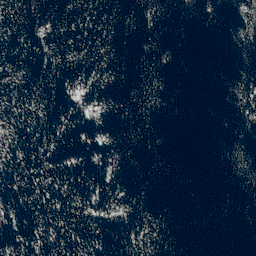

In [3]:
datamodule.get_dataset(stage="fit").get_image(index=0, tile_type=TileType.ANCHOR)

In [7]:
model = TripletTrainerModel(base_arch="resnet18", pretrained=True, margin=1.0, n_embedding_dims=10)
trainer = pl.Trainer(max_epochs=2)

trainer.fit(model, datamodule=datamodule)

/home/earlcd/anaconda2/envs/convml_tt/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name     | Type       | Params
----------------------------------------
0 | backbone | Sequential | 11.2 M
1 | head     | Sequential | 533 K 
2 | encoder  | Sequential | 11.7 M
----------------------------------------
11.7 M    Trainable params
0         Non-trainable params
11.7 M    Total params
46.838    Total estimated model params size (MB)
/home/earlcd/anaconda2/envs/convml_tt/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, tr

1

In [8]:
trainer.save_checkpoint("resnet18__small100.ckpt")